In [1]:
!pip install scipy

In [154]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy import stats

RED  = '#B13E26'
LRED = '#D38473'
BLUE = '#306693'
LBLUE = '#86B3D9'
GREEN = '#677d00'
LGREEN = '#acd373'
ORANGE = '#E69500'

def basic(axes=None):
    """
    Clean axes

    :param axes:
    :return:
    """

    if axes is None:
        axes = plt.gca()

    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.get_xaxis().tick_bottom()
    axes.get_yaxis().tick_left()


In [13]:
female = pd.read_csv('./data/ANSUR II FEMALE Public.csv')

In [14]:
female.describe()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,...,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,22306.606244,229.651057,1335.095166,311.198389,215.739678,1239.029708,228.110272,182.05136,365.348943,305.578550,...,355.136455,980.149043,677.582075,154.792548,794.190332,35.072004,1.781470,28.943605,64.601712,147.505035
std,20904.730297,31.464691,58.079885,17.164691,14.891757,55.801958,11.771007,9.64192,18.298851,30.757033,...,23.945046,50.022715,109.846458,7.827695,38.194755,955.582848,0.999536,8.332078,2.801938,22.855371
min,10037.000000,155.000000,1115.000000,249.000000,170.000000,1038.000000,194.000000,151.00000,283.000000,216.000000,...,289.000000,805.000000,358.000000,124.000000,672.000000,1.000000,1.000000,17.000000,56.000000,86.000000
25%,17667.000000,207.000000,1298.000000,300.000000,205.000000,1202.000000,220.000000,175.00000,353.000000,285.000000,...,338.000000,947.000000,601.000000,150.000000,769.000000,1.000000,1.000000,22.000000,63.000000,130.000000
50%,22096.500000,227.000000,1332.000000,311.000000,215.000000,1236.000000,227.000000,182.00000,365.000000,304.000000,...,355.000000,977.500000,668.000000,154.000000,794.000000,2.000000,2.000000,27.000000,64.000000,145.000000
75%,26089.750000,249.000000,1374.000000,323.000000,225.000000,1277.000000,236.000000,188.00000,378.000000,324.000000,...,370.000000,1013.000000,745.750000,160.000000,819.000000,3.000000,2.000000,34.000000,66.000000,161.000000
max,920103.000000,358.000000,1536.000000,371.000000,275.000000,1419.000000,270.000000,216.00000,422.000000,435.000000,...,432.000000,1142.000000,1196.000000,183.000000,941.000000,42351.000000,6.000000,58.000000,80.000000,270.000000


In [15]:
stat = female.stature / 10

In [16]:
weight = female.weightkg /10

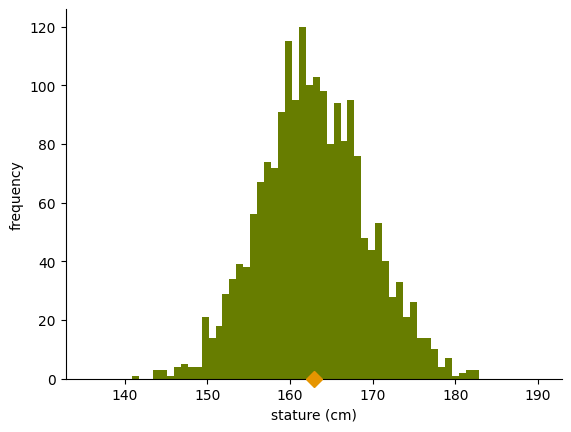

In [17]:
plt.hist(female.stature / 10, bins=50, color=GREEN)

# plt.vlines([stat.mean()], ymin=0, ymax=10, linewidth=6, color=ORANGE)

plt.plot([stat.mean()], [0], 'D', zorder=10, markersize=8, clip_on=False, color=ORANGE)
basic()

plt.xlabel('stature (cm)')
plt.ylabel('frequency')

w = 30
plt.xlim(stat.mean() - w, stat.mean() + w)

plt.savefig('../images/gaussians/soldiers.svg')

In [18]:
n = 100_000_000
synth = np.random.normal(loc = stat.mean(), scale=stat.std(), size=(n, ))

synth[:100]

array([168.38249888, 163.20242824, 160.3449589 , 159.98159046,
       165.92221241, 164.73121561, 163.1783351 , 150.67267177,
       179.94954345, 156.77423076, 165.23328657, 166.90880514,
       159.3990758 , 160.49954177, 164.8496567 , 163.37816592,
       169.96777775, 164.10025243, 162.45488523, 171.12772394,
       162.49774665, 157.35600055, 165.02516297, 169.22321935,
       172.23993274, 161.55977505, 162.8145405 , 168.53160955,
       154.1777418 , 163.13087026, 170.54002699, 153.10145394,
       164.96707334, 156.68444207, 151.86263079, 162.93222215,
       166.427119  , 160.07553305, 163.04255704, 180.69329153,
       165.1767542 , 166.92307245, 168.45414013, 155.52757774,
       166.62815675, 165.2314062 , 138.11003194, 158.64653694,
       168.07113245, 166.19296276, 161.53950108, 175.1589226 ,
       151.60031697, 158.85818753, 159.78661609, 168.13066338,
       170.87612183, 167.35901094, 169.41852698, 168.36929335,
       153.97483224, 163.16210836, 162.56232727, 158.21

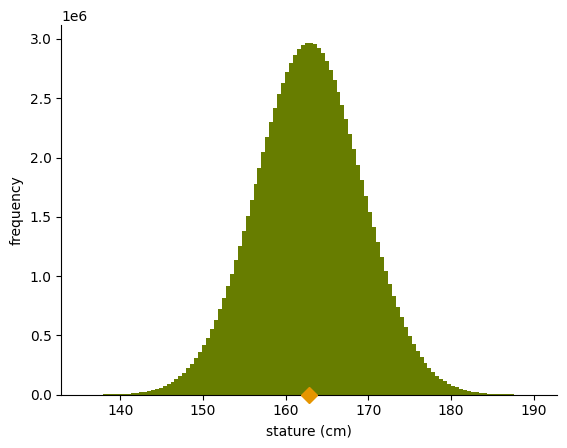

In [19]:
plt.hist(synth, bins=150, color=GREEN)

plt.plot([stat.mean()], [0], 'D', zorder=10, markersize=8, clip_on=False, color=ORANGE)
basic()

w = 30
plt.xlim(stat.mean() - w, stat.mean() + w)

plt.xlabel('stature (cm)')
plt.ylabel('frequency')


plt.savefig('../images/gaussians/soldiers-synth.svg')

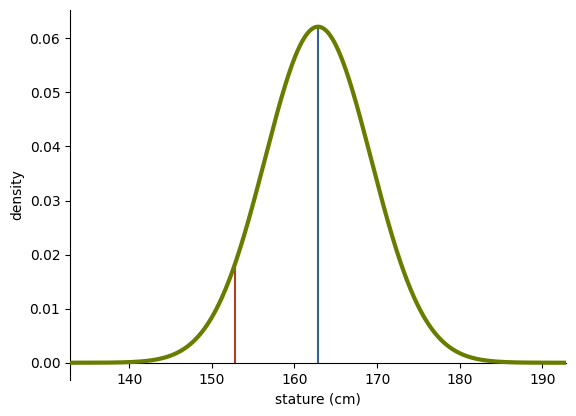

In [20]:
# Plot the density fucntion
w = 30

x = np.linspace(stat.mean() - w, stat.mean() + w, num = 1_000)
mu, sig = stat.mean(), stat.std()
density = lambda x : 1.0 / np.sqrt(2 * np.pi * (sig ** 2)) * np.exp(- (1/(2 * sig ** 2)) * (mu -x ) ** 2) 
y = density(x)

plt.plot(x, y, color=GREEN, linewidth=3, zorder=10)

# plt.plot([stat.mean()], [0], 'D', zorder=10, markersize=8, clip_on=False, color=ORANGE)
basic()

plt.vlines([stat.mean()], ymin=0, ymax=density(stat.mean()), color=BLUE)
plt.vlines([stat.mean()-10], ymin=0, ymax=density(stat.mean()-10), color=RED)


w = 30
plt.xlim(stat.mean() - w, stat.mean() + w)

plt.gca().spines['bottom'].set_position('zero')

plt.xlabel('stature (cm)')
plt.ylabel('density')

plt.savefig('../images/density-question.svg')

blue prob 0.2446013832271819
blue prob 0.07556164928039028


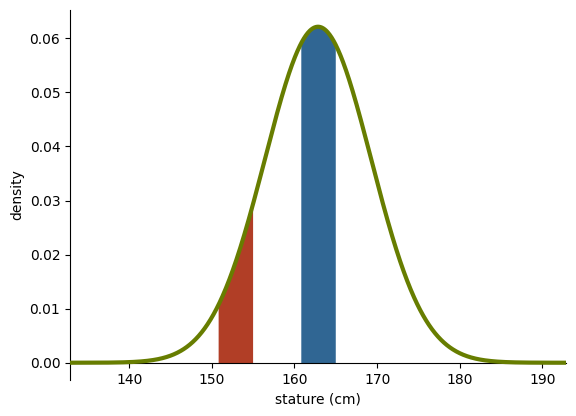

In [21]:
# Plot the density fucntion
w = 30

x = np.linspace(stat.mean() - w, stat.mean() + w, num = 1_000)
mu, sig = stat.mean(), stat.std()
density = lambda x : 1.0 / np.sqrt(2 * np.pi * (sig ** 2)) * np.exp(- (1/(2 * sig ** 2)) * (mu -x ) ** 2) 
y = density(x)

plt.plot(x, y, color=GREEN, linewidth=3, zorder=10)

# plt.plot([stat.mean()], [0], 'D', zorder=10, markersize=8, clip_on=False, color=ORANGE)
basic()

# plt.vlines([stat.mean()], ymin=0, ymax=density(stat.mean()), color=BLUE)
# plt.vlines([stat.mean()-10], ymin=0, ymax=density(stat.mean()-10), color=RED)

nd = scipy.stats.norm(stat.mean(), stat.std())


interval = np.linspace(stat.mean()-2, stat.mean()+2, num=1_000)
plt.fill_between(interval, density(interval), color=BLUE)

print('blue prob', nd.cdf(stat.mean()+2) - nd.cdf(stat.mean()-2))


interval = np.linspace(stat.mean()-10-2, stat.mean()-10+2, num=1_000)
plt.fill_between(interval, density(interval), color=RED)

print('blue prob', nd.cdf(stat.mean()-10+2) - nd.cdf(stat.mean()-10-2))

w = 30
plt.xlim(stat.mean() - w, stat.mean() + w)

plt.gca().spines['bottom'].set_position('zero')

plt.xlabel('stature (cm)')
plt.ylabel('density')

plt.savefig('../images/density-question-filled.svg')

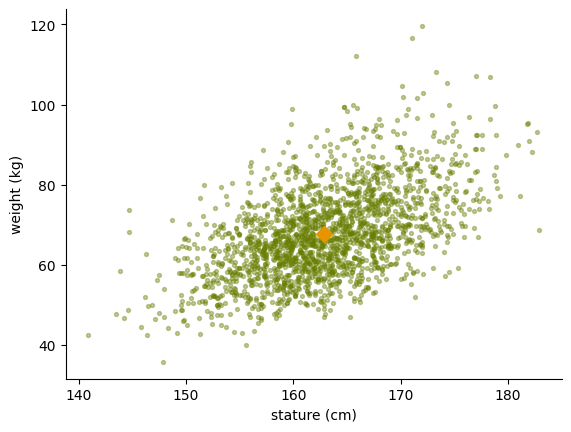

In [22]:
plt.scatter(stat, weight, color=GREEN, alpha=0.4, s=8)
plt.plot([stat.mean()], [weight.mean()], 'D', zorder=10, markersize=8, clip_on=False, color=ORANGE)

plt.xlabel('stature (cm)')
plt.ylabel('weight (kg)')

basic()

plt.savefig('../images/gaussians/soldiers-2d.svg')

In [23]:
import torch
from torch import nn

net = nn.Sequential(
    nn.Linear(2, 128), nn.ReLU(),
    nn.Linear(128, 128), nn.ReLU(),
    nn.Linear(128, 128), nn.ReLU(),
    nn.Linear(128, 128), nn.ReLU(),
    nn.Linear(128, 128), nn.ReLU(),
    nn.Linear(128, 128), nn.ReLU(),
    nn.Linear(128, 128), nn.ReLU(),
    nn.Linear(128, 128), nn.ReLU(),    
    nn.Linear(128, 128), nn.ReLU(),
    nn.Linear(128, 2)
)

x = torch.randn(100_000, 2)
y = net(x)

y = y.detach().numpy()

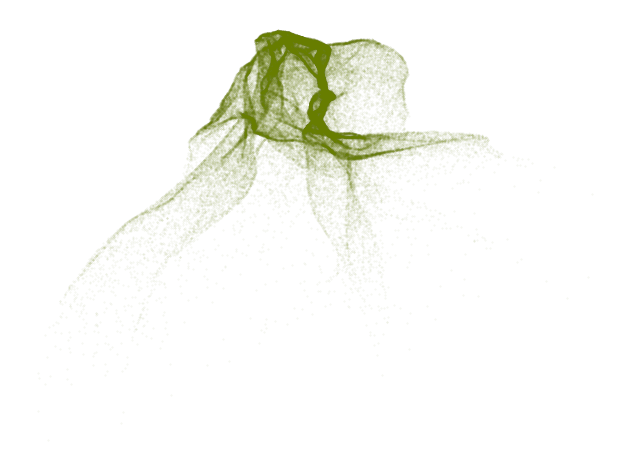

In [33]:
plt.scatter(y[:, 0], y[:, 1], color=GREEN, alpha=0.1, s=0.1)

plt.gca().spines[:].set_visible(False)
plt.xticks([])
plt.yticks([])


# crop
# x0, x1 = plt.xlim()
# r = x1 - x0
# plt.xlim(x0 + r * 0.2, x1 - r * 0.2)

# y0, y1 = plt.ylim()
# r = y1 - y0
# plt.ylim(y0 + r * 0.3, y1 - r * 0.2)

plt.tight_layout()
# plt.savefig('../images/gaussians/neural-net.png', dpi=300)



In [34]:
print('mean height (cm)', stat.mean())

nd = scipy.stats.norm(stat.mean(), stat.std())

nd.cdf(163) - nd.cdf(162)

mean height (cm) 162.84733131923463


0.06198764836234483

In [35]:
nd.cdf(162.9) - nd.cdf(162.8)

0.006214038065487537

In [36]:
nd.cdf(162.84734) - nd.cdf(162.84733)

6.214101425094931e-07

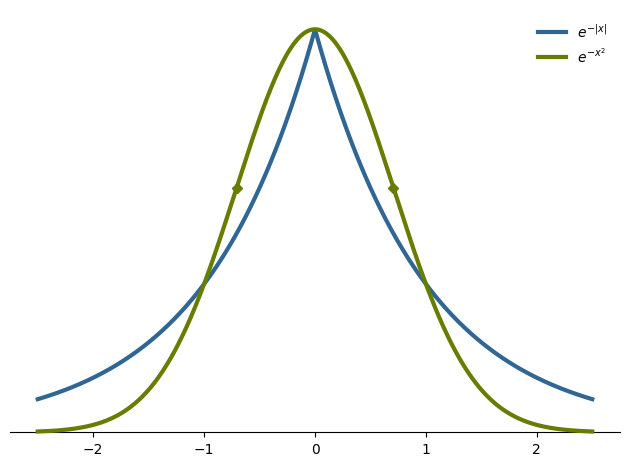

In [37]:
# Plot the rawdensity fucntion
w = 30

x = np.linspace(-2.5, 2.5, num = 1_000)
expo = lambda q :  np.exp(- np.abs(q))
sqexpo = lambda q :  np.exp(- ( q ) ** 2)

plt.plot(x, expo(x), color=BLUE, linewidth=3, zorder=10, label='$e^{-|x|}$')
plt.plot(x, sqexpo(x), color=GREEN, linewidth=3, zorder=10, label='$e^{-x^2}$')

infs = np.asarray([-np.sqrt(0.5), np.sqrt(0.5)])
plt.plot(infs, sqexpo(infs), 'D', zorder=10, markersize=5, clip_on=False, color=GREEN)

ax = plt.gca()
ax.spines['left'].set_visible(False)
plt.yticks([])
basic()
plt.gca().spines['bottom'].set_position('zero')

plt.legend(frameon=False)

plt.tight_layout()

plt.savefig('../images/gaussians/exp-vs-squaredexp.svg')

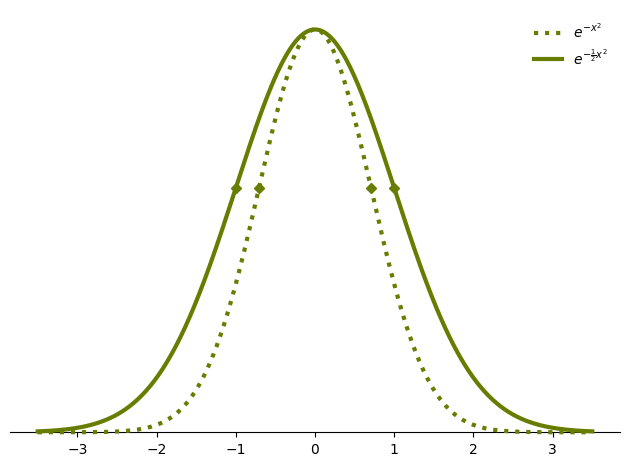

In [38]:
# Plot the rawdensity fucntion
w = 30

x = np.linspace(-3.5, 3.5, num = 1_000)
sqexpo = lambda q :  np.exp(- ( q ) ** 2)
sqexph = lambda q :  np.exp(-  0.5 * q  ** 2)

plt.plot(x, sqexpo(x), color=GREEN, linewidth=3, linestyle=':', zorder=10, label='$e^{-x^2}$')
plt.plot(x, sqexph(x), color=GREEN, linewidth=3, zorder=10, label='$e^{-\\frac{1}{2}x^2}$')

infs = np.asarray([-np.sqrt(0.5), np.sqrt(0.5)])
plt.plot(infs, sqexpo(infs), 'D', zorder=10, markersize=5, clip_on=False, color=GREEN)

infs = np.asarray([-1, 1])
plt.plot(infs, sqexph(infs), 'D', zorder=10, markersize=5, clip_on=False, color=GREEN)

# plt.vlines(infs, ymin=0, ymax=sqexph(infs), color=GREEN)

ax = plt.gca()
ax.spines['left'].set_visible(False)
plt.yticks([])
basic()
plt.gca().spines['bottom'].set_position('zero')

plt.legend(frameon=False)

plt.tight_layout()

plt.savefig('../images/gaussians/move-inflection-pts.svg')

In [39]:
np.exp(2)

7.38905609893065

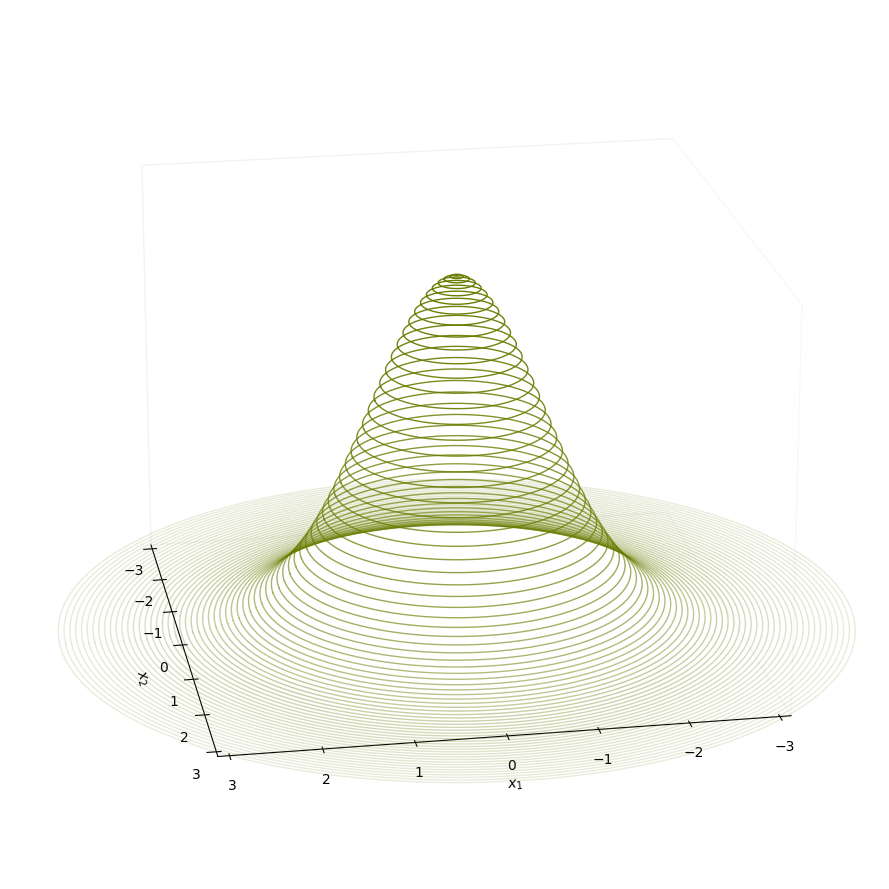

In [166]:
x1r = (-3, 3)
x2r = (-3, 3)

h = 1000 # step nums in the mesh
x1, x2 = np.meshgrid(np.arange(x1r[0], x1r[1], (x1r[1] - x1r[0])/h),
                     np.arange(x2r[0], x2r[1], (x2r[1] - x2r[0])/h))

f = lambda x : np.exp(-0.5*np.linalg.norm(x, axis=1)**2)

x = np.column_stack((x1.ravel(), x2.ravel()))
values = f(x)

values = values.reshape(x1.shape)

# 3D plot for good measure

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 80)

# ax.plot_surface(x1, x2, values, rstride=50, cstride=50, cmap='bone', alpha=0.2)

angle = np.linspace(0, 2*np.pi, num=500)
x = np.concatenate( (np.cos(angle)[:, None], np.sin(angle)[:, None]), axis=1)

for diam in np.linspace(0.01, 4.5, num=70):
    xp = x * diam
    z = f(xp)
    density = z[0]

    ax.plot(xp[:, 0], xp[:, 1], z, zorder=10, linewidth=1, c=GREEN, alpha = density ** 0.3 * 0.9 + 0.1)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$density$')
                              
ax.set_zticks([])
ax.set_zlim([0, 1.1])
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])

# ax.set_axis_off()
# ax.get_zaxis().set_visible(False)
ax.zaxis.set_label_position('none')
ax.zaxis.set_ticks_position('none')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('w')
ax.grid(visible=False)

# ax.spines['left'].set_position('zero')
plt.tight_layout()
# w, h = fig.get_size_inches()

# print(w, h)
# trim = 3, 3
# fig.set_size_inches(w-trim[0], h -trim[1])

plt.savefig('../images/gaussians/bivariate.svg', bbox_inches=mpl.transforms.Bbox([[2, 0.5], [10.5, 6.5]]), pad_inches=0)

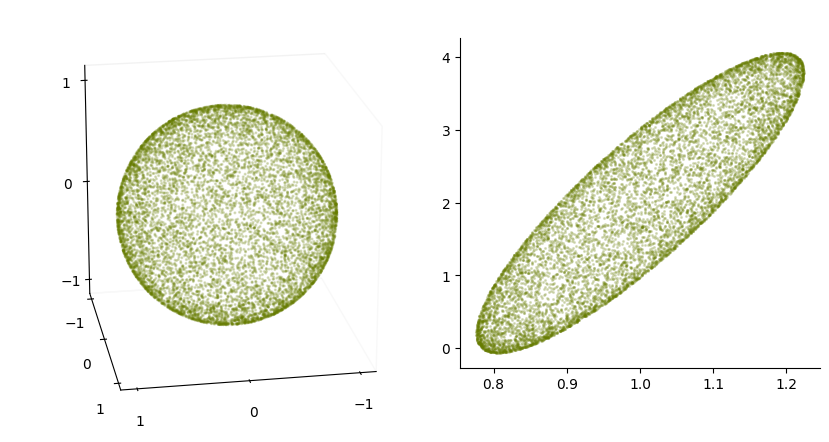

In [236]:
# points on a sphere
x = np.random.normal(size=[10_000, 3])
x = x / np.sqrt(np.sum((x ** 2), axis=1, keepdims=True))

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.view_init(20, 80)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.zaxis.pane.set_edgecolor('w')
ax.grid(visible=False)

ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])

ax.set_box_aspect((np.ptp(x[:, 0]), np.ptp(x[:, 1]), np.ptp(x[:, 1])))

ax.scatter(x[:, 0], x[:, 1], x[:, 2], s=1.5, alpha=0.2, color=GREEN)

ax = fig.add_subplot((0.5, 0.25, 0.3, 0.55))

A = np.asarray([[0.1,0.2,0], [0,2,0.5]])
t = np.asarray([1,2])

xp = x @ A.T + t[None, :]

ax.scatter(xp[:, 0], xp[:, 1], alpha=0.2, s=1.5, color=GREEN)
basic()

# plt.tight_layout()

plt.savefig('../images/gaussians/2s-to-3d.png', bbox_inches=mpl.transforms.Bbox([[2, 0.8], [10, 5]]), pad_inches=0)
